In [1]:
!pip install tensorflow_datasets

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto

tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()  # comment this line if using tf2.0 or above


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Num of training examples:", num_train_examples)
print("Num of test examples:", num_test_examples)

Num of training examples: 60000
Num of test examples: 10000


## Preprocessing the data

In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

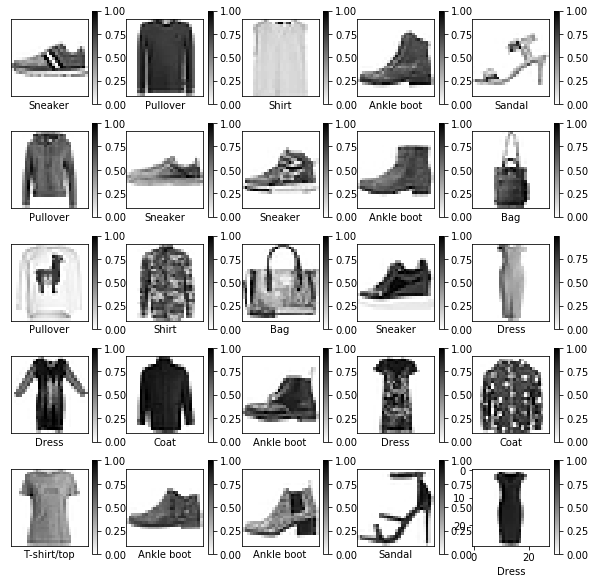

In [7]:
# explore
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in train_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    
    
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),   # 2d-array of 28x28 to 1d of 784 pixels
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4959 - acc: 0.8276
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3780 - acc: 0.8644
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3400 - acc: 0.8760
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3096 - acc: 0.8864
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2973 - acc: 0.8911


In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset,
                                          steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 1s 3ms/step - loss: 0.3541 - acc: 0.8735


In [17]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
    print(predictions.shape)
    print(predictions[0])
    print("pred:", np.argmax(predictions[0]), "label:", test_labels[0])

(32, 10)
[3.12881493e-05 6.53742021e-08 1.13233216e-02 3.68109031e-05
 1.20391846e-01 1.54524912e-07 8.68205786e-01 1.21266419e-08
 1.06488205e-05 6.66386057e-10]
pred: 6 label: 6


## Fancy

In [20]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[..., 0], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_labels:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_labels]),
               color = color)
    
def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_labels = predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_labels].set_color('blue')
            

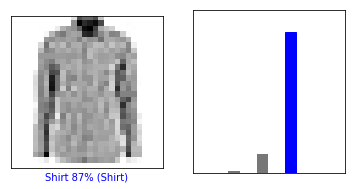

In [21]:
# first pic
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

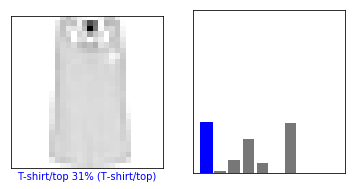

In [23]:
# first pic
i = 2
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

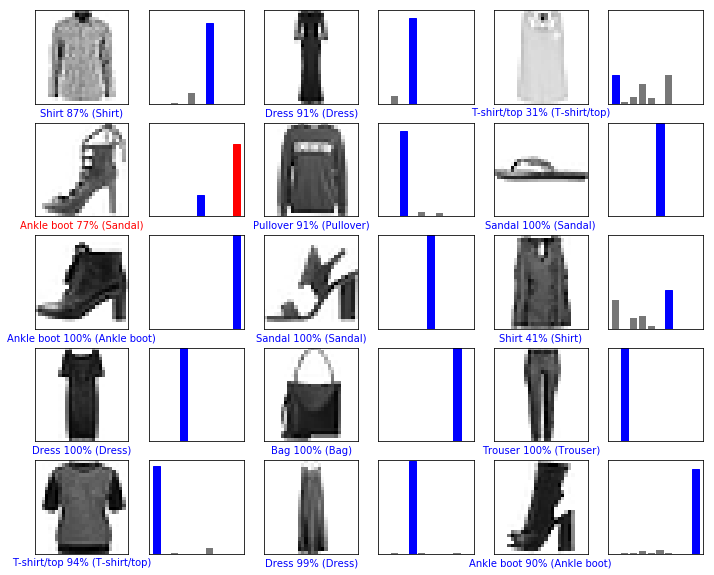

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [25]:
# 1st img from the test set
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [26]:
# inorder to predict one img, still need to add it to a list
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.12881239e-05 6.53742092e-08 1.13233235e-02 3.68109468e-05
  1.20391794e-01 1.54524926e-07 8.68205905e-01 1.21266668e-08
  1.06488123e-05 6.66384892e-10]]


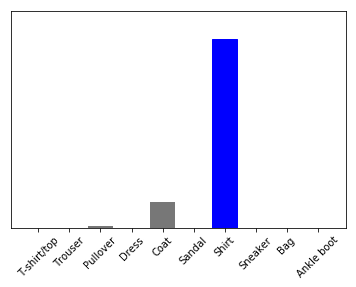

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

6